### Semana 9: Agujeros negros 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import sympy as sp
import einsteinpy.symbolic as es

plt.style.use('bmh')

#### Singularidades y radio de Schwarzschild:
La métrica de Schwarzschild, en coordenadas de curvatura, está dada por
$$
ds^2 = \left( 1 - \frac{2m}{r} \right) d(c t)^2 - \frac{dr^2}{\left( 1 - \frac{2m}{r} \right)} - r^2 [d\theta^2 + \sin^2\theta d\varphi^2].
$$

In [2]:
#Definición de coordenadas y símbolos extras:
coor = sp.symbols('ct r theta phi')
m = sp.symbols('m')

In [3]:
#Definición de la métrica de Schwarzschild:
metric = [[0 for i in range(4)] for i in range(4)]
metric[0][0] = 1 - 2*m/coor[1]
metric[1][1] = -(1 - 2*m/coor[1])**(-1)
metric[2][2] = -coor[1]**2
metric[3][3] = -coor[1]**2*sp.sin(coor[2])**2

#Creando el objeto métrico:
m_obj = es.MetricTensor(metric, coor)
m_obj.tensor()                          #Visualizar la métrica.

[[-2*m/r + 1, 0, 0, 0], [0, -1/(-2*m/r + 1), 0, 0], [0, 0, -r**2, 0], [0, 0, 0, -r**2*sin(theta)**2]]

In [4]:
#Cálculo de los símbolos de Christoffel:
ch = es.ChristoffelSymbols.from_metric(m_obj)
ch.tensor()

[[[0, m/(r**2*(-2*m/r + 1)), 0, 0], [m/(r**2*(-2*m/r + 1)), 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[-2*m*(m/r - 1/2)/r**2, 0, 0, 0], [0, 2*m*(m/r - 1/2)/(r**2*(-2*m/r + 1)**2), 0, 0], [0, 0, 2*r*(m/r - 1/2), 0], [0, 0, 0, 2*r*(m/r - 1/2)*sin(theta)**2]], [[0, 0, 0, 0], [0, 0, 1/r, 0], [0, 1/r, 0, 0], [0, 0, 0, -sin(theta)*cos(theta)]], [[0, 0, 0, 0], [0, 0, 0, 1/r], [0, 0, 0, cos(theta)/sin(theta)], [0, 1/r, cos(theta)/sin(theta), 0]]]

In [5]:
# Calculating Riemann Tensor from Christoffel Symbols
rm = es.RiemannCurvatureTensor.from_christoffels(ch)
rm.tensor()

[[[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[0, 2*m/(r**2*(-2*m + r)), 0, 0], [2*m/(r**2*(2*m - r)), 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, -m/r, 0], [0, 0, 0, 0], [m/r, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, -m*sin(theta)**2/r], [0, 0, 0, 0], [0, 0, 0, 0], [m*sin(theta)**2/r, 0, 0, 0]]], [[[0, 2*m*(-2*m + r)/r**4, 0, 0], [2*m*(2*m - r)/r**4, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, -m/r, 0], [0, m/r, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, 0, -m*sin(theta)**2/r], [0, 0, 0, 0], [0, m*sin(theta)**2/r, 0, 0]]], [[[0, 0, m*(2*m - r)/r**4, 0], [0, 0, 0, 0], [m*(-2*m + r)/r**4, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, m/(r**2*(-2*m + r)), 0], [0, m/(r**2*(2*m - r)), 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 2*m*sin(theta)**2/r], [0, 0, -2*m*sin(theta)**2/r, 0]]], [[[0, 0, 0, m*(2*m - r)/r**4], [0, 0, 0, 0],

In [6]:
#Tensor de Riemann con todos los índices contravariantes y covariantes:
rm_up = rm.change_config('uuuu') 
rm_down = rm.change_config('llll') 

In [7]:
#Desplegar en pantalla el Riemann con todos los índices contravariantes:
rm_up.tensor()

[[[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[0, 2*m/r**3, 0, 0], [-2*m/r**3, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, m/(r**4*(2*m - r)), 0], [0, 0, 0, 0], [m/(r**4*(-2*m + r)), 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, m/(r**4*(2*m - r)*sin(theta)**2)], [0, 0, 0, 0], [0, 0, 0, 0], [m/(r**4*(-2*m + r)*sin(theta)**2), 0, 0, 0]]], [[[0, -2*m/r**3, 0, 0], [2*m/r**3, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, m*(-2*m + r)/r**6, 0], [0, m*(2*m - r)/r**6, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, 0, m*(-2*m + r)/(r**6*sin(theta)**2)], [0, 0, 0, 0], [0, m*(2*m - r)/(r**6*sin(theta)**2), 0, 0]]], [[[0, 0, m/(r**4*(-2*m + r)), 0], [0, 0, 0, 0], [m/(r**4*(2*m - r)), 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, m*(2*m - r)/r**6, 0], [0, m*(-2*m + r)/r**6, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, -2*m/(r**7*sin(theta)**2)], [

Observamos que las únicas componentes no nulas son:
\begin{aligned}
R^{0101} &= - R^{0110} = \frac{2m}{r^3}, \\
R^{0202} &= - R^{0220} = \frac{m}{r^4(2m - r)}, \\
R^{0303} &= - R^{0330} = \frac{m}{r^4(2m - r)\sin^2(\theta)}, \\
R^{1001} &= - R^{1010} = - \frac{2m}{r^3}, \\
R^{1212} &= - R^{1221} = - \frac{m(2m-r)}{r^6}, \\
R^{1313} &= - R^{1331} = - \frac{m(2m-r)}{r^6\sin^2(\theta)}, \\
R^{2002} &= - R^{2020} = - \frac{m}{r^4(2m-r)}, \\
R^{2112} &= - R^{2121} = \frac{m(2m-r)}{r^6}, \\
R^{2323} &= - R^{2332} = - \frac{2m}{r^7\sin^2(\theta)}, \\
R^{3003} &= - R^{3030} = - \frac{m}{r^4(2m-r)\sin^2(\theta)}, \\
R^{3113} &= - R^{3131} = \frac{m(2m-r)}{r^6\sin^2(\theta)}, \\
R^{3223} &= - R^{3232} = \frac{2m}{r^7\sin^2(\theta)}.
\end{aligned}

In [8]:
#Desplegar en pantalla el Riemann con todos los índices covariantes:
rm_down.tensor()

[[[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[0, 2*m/r**3, 0, 0], [-2*m/r**3, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, m*(2*m - r)/r**2, 0], [0, 0, 0, 0], [m*(-2*m + r)/r**2, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, m*(2*m - r)*sin(theta)**2/r**2], [0, 0, 0, 0], [0, 0, 0, 0], [m*(-2*m + r)*sin(theta)**2/r**2, 0, 0, 0]]], [[[0, -2*m/r**3, 0, 0], [2*m/r**3, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, m/(-2*m + r), 0], [0, m/(2*m - r), 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, 0, m*sin(theta)**2/(-2*m + r)], [0, 0, 0, 0], [0, m*sin(theta)**2/(2*m - r), 0, 0]]], [[[0, 0, m*(-2*m + r)/r**2, 0], [0, 0, 0, 0], [m*(2*m - r)/r**2, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, m/(2*m - r), 0], [0, m/(-2*m + r), 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, -2*m*r*sin(theta)**2], [0, 0, 2*m*r*sin(theta)**2, 0]]], [[[0, 0, 0, m*(-2*

Observamos que las únicas componentes no nulas son:
\begin{aligned}
R_{0101} &= - R_{0110} = \frac{2m}{r^3}, \\
R_{0202} &= - R_{0220} = \frac{m(2m-r)}{r^2}, \\
R_{0303} &= - R_{0330} = \frac{m(2m-r)\sin^2(\theta)}{r^2}, \\
R_{1001} &= - R_{1010} = - \frac{2m}{r^3}, \\
R_{1212} &= - R_{1221} = - \frac{m}{2m - r}, \\
R_{1313} &= - R_{1331} = - \frac{m \sin^2(\theta)}{2m-r}, \\
R_{2002} &= - R_{2020} =  - \frac{m(2m-r)}{r^2}, \\
R_{2112} &= - R_{2121} = \frac{m}{2m-r}, \\
R_{2323} &= - R_{2332} = - 2m r \sin^2(\theta), \\
R_{3003} &= - R_{3030} = - \frac{m(2m-r)\sin^2(\theta)}{r^2}, \\
R_{3113} &= - R_{3131} = \frac{m \sin^2(\theta)}{2m-r}, \\
R_{3223} &= - R_{3232} = 2mr \sin^2(\theta).
\end{aligned}

La métrica en coordenadas de Eddington-Finkelstein está dada por 
$$
ds^2 = \left(1 - \frac{2m}{r}\right) c^2d\bar{t}^2 - \frac{4m}{r} c \, d\bar{t} \, dr - \left(1 + \frac{2m}{r}\right) dr^2 - r^2 \left(d\theta^2 + \sin^2\theta d\varphi^2\right).
$$

Verfiquemos que es solución de las ecuaciones de campo de Einstein en el vacío.

In [43]:
#Definición de coordenadas y símbolos extras:
coor_EF = sp.symbols('c\\bar{t} r theta phi')
m = sp.symbols('m')

In [44]:
#Definición de la métrica en coordenadas de Eddington-Finkelstein
metric_EF = [[0 for i in range(4)] for i in range(4)]
metric_EF [0][0] = 1 - 2*m/coor_EF[1]
metric_EF [0][1] = -2*m/coor_EF [1]
metric_EF [1][0] = -2*m/coor_EF [1]
metric_EF [1][1] = -(1 + 2*m/coor_EF[1])
metric_EF [2][2] = -coor_EF[1]**2
metric_EF [3][3] = -coor_EF[1]**2*sp.sin(coor_EF[2])**2

#Creando el objeto métrico:
m_EF_obj = es.MetricTensor(metric_EF, coor_EF)
m_EF_obj.tensor()   

[[-2*m/r + 1, -2*m/r, 0, 0], [-2*m/r, -2*m/r - 1, 0, 0], [0, 0, -r**2, 0], [0, 0, 0, -r**2*sin(theta)**2]]

In [45]:
#Cálculo del tensor de Ricci:
Ric_EF = es.RicciTensor.from_metric(m_EF_obj)
Ric_EF.tensor()

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]

In [46]:
#Cálculo del escalar de curvatura:
R_EF = es.RicciScalar.from_riccitensor(Ric_EF)
R_EF.expr

0

Por lo tanto, es solución de las ecuaciones de campo de Einstein en el vacío.

#### Diagrama Espacio-Temporal en Coordenadas de Schwarzschild:

Para fotones salientes, la curva (geodésica) radial tipo luz es
$$
c(t - t_0) = r - r_0 + 2m \ln\left( \frac{r-2m}{r_0 - 2m} \right).
$$

Para fotones entrantes, la curva (geodésica) radial tipo luz es
$$
c(t - t_0) = r_0 - r - 2m \ln\left( \frac{r-2m}{r_0 - 2m} \right).
$$

Si adimensionalizamos con el parámetro $m$:
\begin{aligned}
\frac{c}{m} (t - t_0) &= \frac{r}{m} - \frac{r_0}{m} + 2 \ln\left( \frac{r/m - 2}{r_0/m - 2} \right), \\
\frac{c}{m} (t - t_0) &= \frac{r_0}{m} - \frac{r}{m} - 2 \ln\left( \frac{r/m - 2}{r_0/m - 2} \right).
\end{aligned}

In [9]:
def curve_out_Sch(r,r_0,t_0):
    t = t_0 + r - r_0 + 2*np.log((r - 2)/(r_0 - 2))
    return t

def curve_in_Sch(r,r_0,t_0):
    t = t_0 + r_0 - r - 2*np.log((r - 2)/(r_0 - 2))
    return t

In [30]:
#Condiciones iniciales para r > 2m:
t_0 = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
r_0 = [14.0,10.0,8.0,6.0,4.0,2.5,2.05,2.01]

#Condiciones iniciales para r < 2m:
t_01 = [10.0,8.0,6.0,4.0,2.0,0.0]
r_01 = [0.0,0.0,0.0,0.0,0.0,1.0]

C:\Users\asaav\AppData\Local\Temp\ipykernel_20216\1111067452.py:6: RuntimeWarning: invalid value encountered in log
  t = t_0 + r_0 - r - 2*np.log((r - 2)/(r_0 - 2))
C:\Users\asaav\AppData\Local\Temp\ipykernel_20216\1111067452.py:6: RuntimeWarning: divide by zero encountered in log
  t = t_0 + r_0 - r - 2*np.log((r - 2)/(r_0 - 2))
C:\Users\asaav\AppData\Local\Temp\ipykernel_20216\1111067452.py:2: RuntimeWarning: divide by zero encountered in log
  t = t_0 + r - r_0 + 2*np.log((r - 2)/(r_0 - 2))


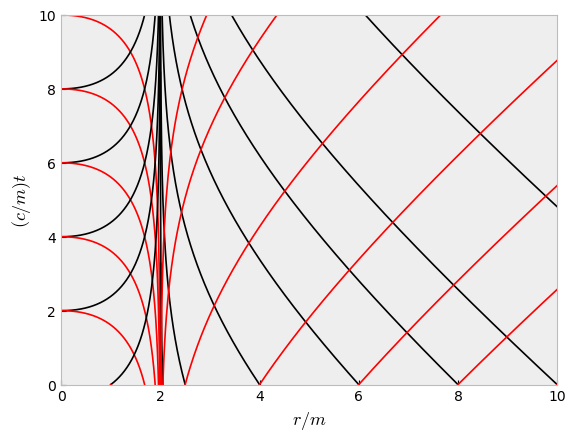

In [31]:
#Gráfica de las curvas para fotones salientes y entrantes para r > 2m:
for i in range(0,len(r_0)):
    r = np.linspace(0,r_0[i],1000)
    r11 = np.linspace(r_0[i],20,1000)
    plt.plot(r,curve_in_Sch(r,r_0[i],t_0[i]), color = 'black',linewidth = 1.2)
    plt.plot(r11,curve_out_Sch(r11,r_0[i],t_0[i]), color = 'red',linewidth = 1.2)

#Gráfica de las curvas para fotones salientes y entrantes para r < 2m:
for j in range(0,len(r_01)):
    r = np.linspace(r_01[j],2,1000)
    plt.plot(r,curve_in_Sch(r,r_01[j],t_01[j]), color = 'black',linewidth = 1.2)
    plt.plot(r,curve_out_Sch(r,r_01[j],t_01[j]), color = 'red',linewidth = 1.2)

plt.ylim(0,10)
plt.xlim(0,10)

plt.grid(False)
plt.xlabel('$r/m$',fontsize = 13)
plt.ylabel('$(c/m) t$',fontsize = 13)

plt.savefig("Fig-Curvas-Nulas-Sch.pdf")

#### Diagrama Espacio-Temporal en Coordenadas de Eddington-Finkelstein:

Para fotones salientes, la curva (geodésica) radial tipo luz es
$$
c(\bar{t} - \bar{t} _0) = r - r_0 + 2m \ln\left| \frac{r-2m}{r_0 - 2m} \right|.
$$

Para fotones entrantes, la curva (geodésica) radial tipo luz es
$$
c(\bar{t} - \bar{t} _0) = r_0 - r.
$$

Si adimensionalizamos con el parámetro $m$:
\begin{aligned}
\frac{c}{m} (\bar{t} - \bar{t} _0) &= \frac{r}{m} - \frac{r_0}{m} + 2 \ln\left| \frac{r/m - 2}{r_0/m - 2} \right|, \\
\frac{c}{m} (\bar{t} - \bar{t} _0)  &= \frac{r_0}{m} - \frac{r}{m}.
\end{aligned}

In [32]:
def curve_out_EF(r,r_0,t_0):
    t = t_0 + r - r_0 + 2*np.log(abs((r - 2)/(r_0 - 2)))
    return t

def curve_in_EF(r,r_0,t_0):
    t = t_0 + r_0 - r
    return t

C:\Users\asaav\AppData\Local\Temp\ipykernel_20216\909742341.py:2: RuntimeWarning: divide by zero encountered in log
  t = t_0 + r - r_0 + 2*np.log(abs((r - 2)/(r_0 - 2)))


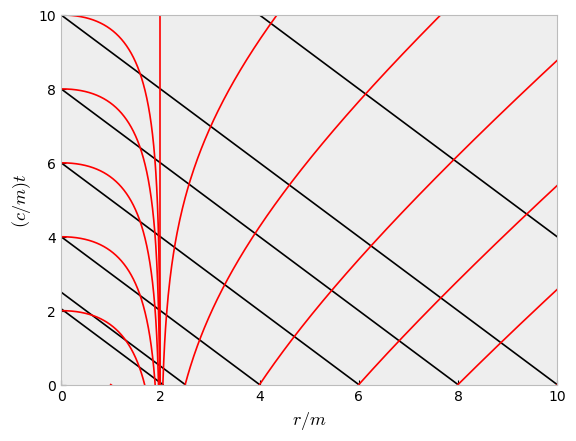

In [37]:
#Gráfica de las curvas para fotones salientes y entrantes para r > 2m:
for i in range(0,len(r_0)-1):
    r = np.linspace(0,r_0[i],1000)
    r11 = np.linspace(r_0[i],20,1000)
    plt.plot(r,curve_in_EF(r,r_0[i],t_0[i]), color = 'black',linewidth = 1.2)
    plt.plot(r11,curve_out_EF(r11,r_0[i],t_0[i]), color = 'red',linewidth = 1.2)

#Gráfica de las curvas para fotones salientes para r < 2m:
for j in range(0,len(r_01)):
    r = np.linspace(r_01[j],2,1000)
    plt.plot(r,curve_out_EF(r,r_01[j],t_01[j]), color = 'red',linewidth = 1.2)

plt.vlines(2,ymin = 0.0,ymax = 10.0, color = 'red',linewidth = 1.2)
plt.ylim(0,10)
plt.xlim(0,10)

plt.grid(False)
plt.xlabel('$r/m$',fontsize = 13)
plt.ylabel('$(c/m) t$',fontsize = 13)

plt.savefig("Fig-Curvas-Nulas-EF.pdf")

#### Partículas cayendo radialmente:

Calculemos la integral 
$$
\int \frac{1}{1 - \frac{2m}{r}} \sqrt{\frac{r}{2m}}dr.
$$

In [2]:
#Símbolos:
r,m = sp.symbols('r,m', positive = True)

In [3]:
#Integrandos:
f = (1/(1 - 2*m/r))*sp.sqrt(r/(2*m))


display(f)

sqrt(2)*sqrt(r)/(2*sqrt(m)*(-2*m/r + 1))

In [4]:
#Cálculo simbólico de la integral:
int = sp.integrate(f,r)

display(int)

sqrt(2)*(2*sqrt(2)*m**(3/2)*log(-sqrt(2)*sqrt(m) + sqrt(r)) - 2*sqrt(2)*m**(3/2)*log(sqrt(2)*sqrt(m) + sqrt(r)) + 4*m*sqrt(r) + 2*r**(3/2)/3)/(2*sqrt(m))

In [6]:
sp.simplify(int)

2*sqrt(2)*sqrt(m)*sqrt(r) + 2*m*log(-sqrt(2)*sqrt(m) + sqrt(r)) - 2*m*log(sqrt(2)*sqrt(m) + sqrt(r)) + sqrt(2)*r**(3/2)/(3*sqrt(m))

Por lo tanto,
\begin{aligned}
\int \frac{1}{1 - \frac{2m}{r}} \sqrt{\frac{r}{2m}}dr &= \frac{2}{3 \sqrt{2m}} r^{3/2} + 2 \sqrt{2m} \sqrt{r}  + 2m \ln\left( \frac{\sqrt{r} - \sqrt{2m}}{\sqrt{r} + \sqrt{2m}}\right) + C \\
&= \frac{2}{3 \sqrt{2m}} \left(r^{3/2} +  6m \sqrt{r} \right) + 2m \ln\left( \frac{\sqrt{r} - \sqrt{2m}}{\sqrt{r} + \sqrt{2m}}\right) + C
\end{aligned}